In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from ucimlrepo import fetch_ucirepo
infrared_thermography_temperature = fetch_ucirepo(id=925)

In [3]:
X = infrared_thermography_temperature.data.features 
y = infrared_thermography_temperature.data.targets

In [4]:
X.head()

,Gender,Age,Ethnicity,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,...,T_FHCC1,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1
0,Male,41-50,White,24.0,28.0,0.8,0.7025,35.0300,35.3775,34.4000,...,33.5775,33.4775,33.3725,33.4925,33.0025,34.5300,34.0075,35.6925,35.6350,35.6525
1,Female,31-40,Black or African-American,24.0,26.0,0.8,0.7800,34.5500,34.5200,33.9300,...,34.0325,34.0550,33.6775,33.9700,34.0025,34.6825,34.6600,35.1750,35.0925,35.1075
2,Female,21-30,White,24.0,26.0,0.8,0.8625,35.6525,35.5175,34.2775,...,34.9000,34.8275,34.6475,34.8200,34.6700,35.3450,35.2225,35.9125,35.8600,35.8850
3,Female,21-30,Black or African-American,24.0,27.0,0.8,0.9300,35.2225,35.6125,34.3850,...,34.4400,34.4225,34.6550,34.3025,34.9175,35.6025,35.3150,35.7200,34.9650,34.9825
4,Male,18-20,White,24.0,27.0,0.8,0.8950,35.5450,35.6650,34.9100,...,35.0900,35.1600,34.3975,34.6700,33.8275,35.4175,35.3725,35.8950,35.5875,35.6175


In [5]:
X_dummies = pd.get_dummies(X, columns=["Gender", "Age", "Ethnicity"])
X_dummies.head()

,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,aveAllL13_1,T_RC1,T_RC_Dry1,...,Age_31-40,Age_41-50,Age_51-60,Age_>60,Ethnicity_American Indian or Alaskan Native,Ethnicity_Asian,Ethnicity_Black or African-American,Ethnicity_Hispanic/Latino,Ethnicity_Multiracial,Ethnicity_White
0,24.0,28.0,0.8,0.7025,35.0300,35.3775,34.4000,34.9175,34.9850,34.9850,...,False,True,False,False,False,False,False,False,False,True
1,24.0,26.0,0.8,0.7800,34.5500,34.5200,33.9300,34.2250,34.7100,34.6325,...,True,False,False,False,False,False,True,False,False,False
2,24.0,26.0,0.8,0.8625,35.6525,35.5175,34.2775,34.8000,35.6850,35.6675,...,False,False,False,False,False,False,False,False,False,True
3,24.0,27.0,0.8,0.9300,35.2225,35.6125,34.3850,35.2475,35.2075,35.2000,...,False,False,False,False,False,False,True,False,False,False
4,24.0,27.0,0.8,0.8950,35.5450,35.6650,34.9100,35.3675,35.6025,35.4750,...,False,False,False,False,False,False,False,False,False,True


In [6]:
y.head()

,aveOralF,aveOralM
0,36.85,36.59
1,37.00,37.19
2,37.20,37.34
3,36.85,37.09
4,36.80,37.04


In [7]:
y_fast = y[["aveOralF"]]
y_fast.head()

,aveOralF
0,36.85
1,37.00
2,37.20
3,36.85
4,36.80


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X_dummies, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((816, 46), (204, 46))

In [9]:
y_train, y_test = train_test_split(y_fast, test_size=0.2, random_state=42)
y_train.shape, y_test.shape

((816, 1), (204, 1))

In [10]:
y_train = np.reshape(y_train, -1)
y_test = np.reshape(y_test, -1)
y_train.shape, y_test.shape

((816,), (204,))

In [11]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
print("Modelo entrenado!")

Modelo entrenado!


In [12]:
y_pred = model.predict(X_test)

In [13]:
rmse = np.sqrt(np.mean(np.square(y_test - y_pred)))
print("RMSE:", round(rmse, 4))

RMSE: 0.2338


In [17]:
rango = y_fast.values.max() - y_fast.values.min()
nrmse = (rmse / rango) * 100
print("NRMSE:", round(nrmse, 4), "%")

NRMSE: 6.0737 %


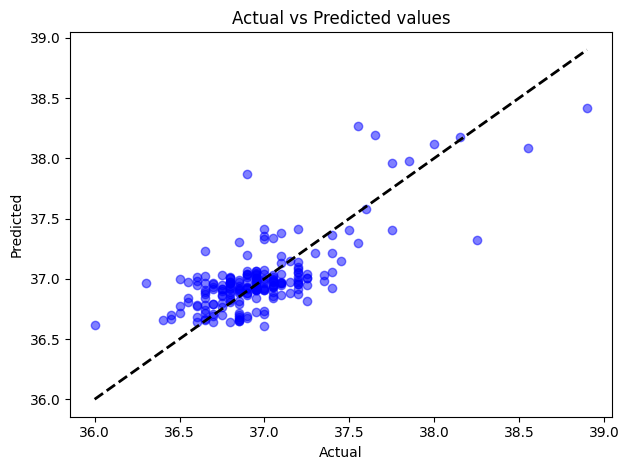

In [20]:
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted values')
plt.tight_layout()
plt.show()

In [21]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))